# Review of numpy random module

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# random number in [0,1)
np.random.random()

0.11595540165772589

In [3]:
# random 48x48 matrix
mat = np.random.random((48,12))
for row in mat:
    for col in row:
        print(f'{col: 0.2f}', end=' ')
    print()

 0.62  0.57  0.20  0.09  0.93  0.53  0.92  0.09  0.15  0.38  0.54  0.84 
 0.95  0.06  0.16  0.93  0.16  0.08  0.17  0.20  0.45  0.24  0.74  0.41 
 0.49  0.77  0.28  0.61  0.67  0.49  0.13  0.32  0.41  0.16  0.20  0.85 
 0.78  0.63  0.10  0.80  0.34  0.95  0.66  0.45  0.52  0.34  0.93  0.00 
 0.83  0.03  0.84  0.27  0.58  0.40  0.46  0.17  0.77  0.69  0.47  0.08 
 0.46  0.95  0.82  0.17  0.85  0.01  0.06  0.11  0.38  0.80  0.87  0.61 
 0.32  0.62  0.87  0.33  0.17  0.31  0.11  0.61  0.49  0.16  0.76  0.47 
 0.98  0.14  0.13  0.83  0.04  0.14  0.18  0.09  0.11  0.33  0.83  0.16 
 0.18  0.03  0.79  0.21  0.22  0.56  0.72  0.34  0.20  0.84  0.84  0.18 
 0.03  0.68  0.13  0.26  0.77  0.04  0.70  0.17  0.62  0.21  1.00  0.39 
 0.28  0.95  0.74  0.35  0.53  0.99  0.31  0.71  0.27  0.93  0.50  0.26 
 0.70  0.87  0.75  0.86  0.32  0.51  0.47  0.39  0.62  0.83  0.60  0.05 
 0.16  0.83  0.42  0.22  0.15  0.77  0.58  0.17  0.44  0.59  0.48  0.91 
 0.84  0.06  0.88  0.75  0.92  1.00  0.72  0.86  0.

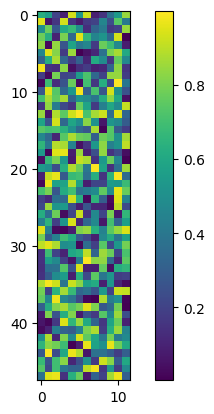

In [4]:
plt.imshow(mat, cmap='viridis')
plt.colorbar()

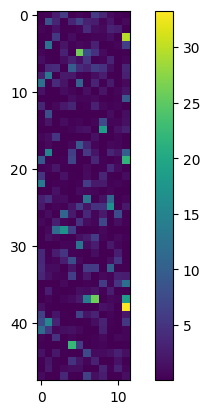

In [5]:
plt.imshow(np.log(mat)**2, cmap='viridis')
plt.colorbar()

In [6]:
U = np.random.random()

U

0.6849374820259075

In [7]:
N = np.random.normal(0, 1, size=[3,2])

N

array([[-0.77408383, -1.20550041],
       [-0.4129909 ,  0.44178441],
       [-1.26043355,  1.92156211]])

# Random variables


## Random motion
Let $R_t$ a continuous random variable for each time $t_i$, the increment from time $t_i$ to $t_j$ is
$$R_{j}-R_{i}\sim\text{Normal}(0, (t_j-t_i)\sigma^2):=R_i$$
where $\sigma$ is called the voltage, and $R_0$ is the initial position.

This stochastic process is called the Random motion. 

$$
R_t = R_{t_0} + (R_{t_1} - R_{t_0}) + (R_{t_2}-R_{t_1}) + \dots=R_0 + R_1 + R_2 + \dots
$$


In [8]:
def run_brownian(ts, sigma, B0):
    bs = [B0]
    for t in ts:
        bs.append(bs[-1] + sigma * np.random.normal(0, 1) * np.sqrt(t))
    return np.array(bs)

the above function works by generating a random number from a normal distribution with mean 0 and variance 1. It then multiplies this number by the square root of the time interval and adds it to the previous value of the random walk. This is repeated for each time interval.

The square root is used because the variance of a sum of independent random variables is the sum of their variances. Since the variance of a normal distribution is equal to the square of its standard deviation, the standard deviation of the sum of independent random variables is the square root of the sum of their variances.

In [9]:
S0 = 10
ts = np.linspace(1, 10, 1000)
S = np.exp(run_brownian(ts, 0.01, 0)) * S0

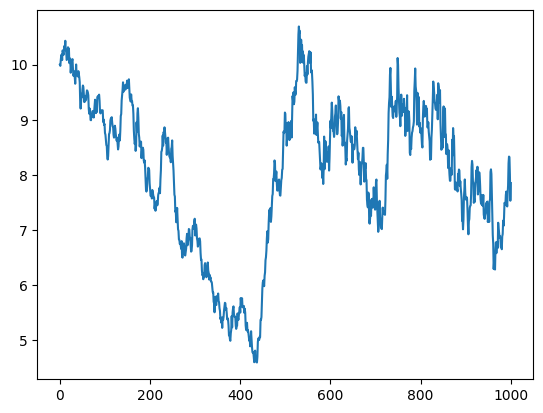

In [10]:
import matplotlib.pyplot as plt
plt.plot(S)

# Example of a Exponential of a random motion

$S_t=S_0e^{R_t}$. 

where $R_t$ is a random motion with mean 0 and variance $\sigma^2t$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def random_motion(ts, sigma, B0):
    bs = [B0]
    for t in ts:
        bs.append(bs[-1] + sigma * np.random.normal(0, 1) * np.sqrt(t))
    return np.array(bs)

In [13]:
def run_stock_simul(ts, sigma, S0):
    return np.exp(random_motion(ts, sigma, 0)) * S0

# RPM

Simulate a 2-dimensional random planar motion, at time $t_i$. Add a bunch of normals together.    

Use two random variables $X_i$ and $Y_i$ to represent the step size in $x$ and $y$ direction respectively.

Alternatively could direction randomly choose a and a size step.

## Question 1
Simulate a random planar motion with $\sigma=1$, start $(0,0)$. Plotted it is path, for timing $0.1, 0.2, up until and including, 100$ $


## Simulate the 

random planar motion

In [14]:
X = random_motion(list(range(0, 100)), 1, 0)
Y = random_motion(list(range(0, 100)), 1, 0)

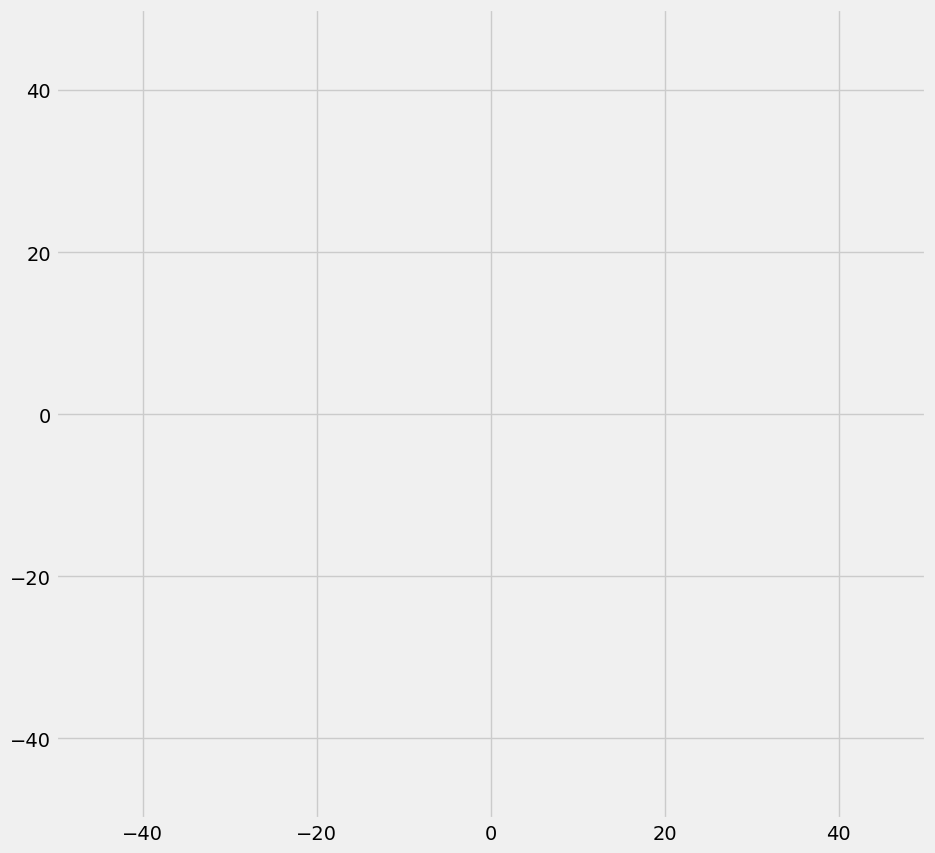

In [15]:
# simple matplotlib animation of the brownian motion in the plane

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
style.use('fivethirtyeight')

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim(-50, 50)
ax1.set_ylim(-50, 50)

def animate(i):
    ax1.plot(X[:i], Y[:i])

ani = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=False, repeat=False)
plt.show()

In [16]:
# inline html plot

# from IPython.display import HTML
# HTML(ani.to_html5_video())

In [17]:
# save as matplotlib animation to gif

ani.save('brownian.gif', writer='imagemagick', fps=60)

MovieWriter imagemagick unavailable; using Pillow instead.
